In [38]:
import geopandas as gpd
import numpy as np
import shapely

In [39]:
N_SQUARES = 40
SQUARE_WIDTH = 0.2
N_CLASSES = 4

Create dummy data

<Axes: >

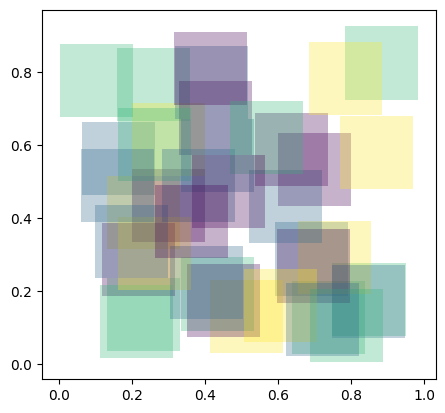

In [40]:
tl_corners = np.random.random((N_SQUARES, 2)) * (1 - SQUARE_WIDTH)
boxes = [shapely.box(tl[0], tl[1], tl[0] + SQUARE_WIDTH, tl[1] + SQUARE_WIDTH) for tl in tl_corners]
classes = np.random.randint(0, N_CLASSES, size=N_SQUARES)

classified_polygons = gpd.GeoDataFrame({"geometry": boxes, "classes": classes})
classified_polygons.plot("classes",alpha=0.3)

   counts_1  counts_2                                           geometry  \
0       1.0       1.0  POLYGON ((0.20025 0.3334, 0.20025 0.38489, 0.3...   
1       1.0       0.0  POLYGON ((0.20025 0.5334, 0.40025 0.5334, 0.40...   
2       0.0       1.0  POLYGON ((0.31761 0.18489, 0.11761 0.18489, 0....   

   counts  
0     2.0  
1     1.0  
2     1.0  


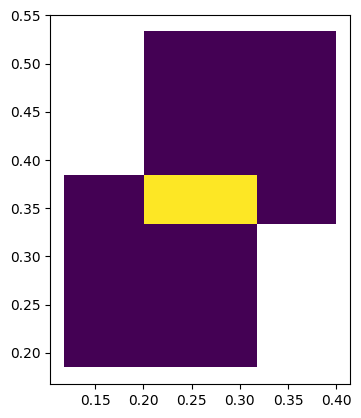

In [ ]:
import matplotlib.pyplot as plt
def merge_classified_polygons(classified_polygons, class_column=None):
    grouped = {k[0]:v for k, v in classified_polygons.groupby([class_column])}
    for k, v in grouped.items():
        v.drop("classes", axis=1, inplace=True)
        v["counts"] = 1

        overlay = v.iloc[0:1]

        for i in range(1, len(v)):
            overlay = gpd.overlay(overlay, v.iloc[i:i+1], how="union")
            overlay.fillna(0, inplace=True)
            overlay["counts"] = overlay["counts_1"] + overlay["counts_2"]
            print(overlay)
            overlay.plot("counts")
            plt.show()
    # Split by class
    # Group each class and count the number of contributions
    #

merge_classified_polygons(classified_polygons=classified_polygons, class_column="classes")